# Understanding your data

You will soon start building models in Keras to predict wages based on various professional and demographic factors. Before you start building a model, it's good to understand your data by performing some exploratory analysis.

The data is pre-loaded into a pandas DataFrame called df. Use the .head() and .describe() methods in the IPython Shell for a quick overview of the DataFrame.

The target variable you'll be predicting is wage_per_hour. Some of the predictor variables are binary indicators, where a value of 1 represents True, and 0 represents False.

Of the 9 predictor variables in the DataFrame, how many are binary indicators? The min and max values as shown by .describe() will be informative here. How many binary indicator predictors are there

In [1]:
import pandas  as pd 
df=pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/hourly_wages.csv')
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [7]:
df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Specifying a model

Now you'll get to work with your first model in Keras, and will immediately be able to run more complex neural network models on larger datasets compared to the first two chapters.

To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.

As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience. You can find the dataset in a pandas dataframe called df. For convenience, everything in df except for the target has been converted to a NumPy matrix called predictors. The target, wage_per_hour, is available as a NumPy matrix called target.

For all exercises in this chapter, we've imported the Sequential model constructor, the Dense layer constructor, and pandas.

In [12]:
df.columns

Index(['wage_per_hour', 'union', 'education_yrs', 'experience_yrs', 'age',
       'female', 'marr', 'south', 'manufacturing', 'construction'],
      dtype='object')

# predcitors 

In [18]:
predictors=df.drop('wage_per_hour', axis=1)
predictors=predictors.to_numpy()
print(predictors.shape)

(534, 9)


# Target

In [23]:
a=df.iloc[:,1:]
b=df.iloc[:,1:].values

target =df.wage_per_hour.to_numpy()
print(type(target))
target.shape

<class 'numpy.ndarray'>


(534,)

# Compiling the model

You're now going to compile the model you specified earlier. To compile the model, you need to specify the optimizer and loss function to use. In the video, Dan mentioned that the Adam optimizer is an excellent choice. You can read more about it as well as other keras optimizers here, and if you are really curious to learn more, you can read the original paper that introduced the Adam optimizer.

In [24]:
# Import necessary modules
# tensor-Keras
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu' ,input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


# Fitting the model

You're at the most fun part. You'll now fit the model. Recall that the data to be used as predictive features is loaded in a NumPy matrix called predictors and the data to be predicted is stored in a NumPy matrix called target. Your model is pre-written and it has been compiled with the code from the previous exercise.

In [25]:
# Fit the model
model.fit(predictors,target)

17/17 [==============================] - 0s 611us/step - loss: 181.7273


In [26]:
df=pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/titanic_all_numeric.csv')
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [48]:
df.columns 

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'male',
       'age_was_missing', 'embarked_from_cherbourg',
       'embarked_from_queenstown', 'embarked_from_southampton'],
      dtype='object')

In [68]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import tensorflow as tf 
predictors=df.drop('survived', axis=1).to_numpy()
n_cols = predictors.shape[1]
target = df['survived'].to_numpy()
#### Create the encoder.
encoder = LabelEncoder()

encoder.fit(target)   # Assume for simplicity all features are categorical.

target_le = encoder.transform(target)

target_oh =tf.keras.utils.to_categorical(target_le)

print("target_le",target_le.shape)

print("target_oh",target_oh.shape)

print(encoder.classes_)

target_le (891,)
target_oh (891, 2)
[0 1]


In [69]:
import numpy as np

predictors = np.asarray(predictors).astype(np.float32)

In [70]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Convert the target to categorical: target

# Set up the model
model =Sequential()

# Add the first layer
model.add(Dense(32,activation='relu',input_shape=(n_cols,)))
# Add the output layer
model.add(Dense(2,activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
model.fit(predictors,target_oh )


28/28 [==============================] - 0s 471us/step - loss: 2.4029 - accuracy: 0.5982


# Making predictions

The trained network from your previous coding exercise is now stored as model. New data to make predictions is stored in a NumPy array as pred_data. Use model to make predictions on your new data.

In [ ]:
# Calculate predictions: predictions
predictions = model.predict(pred_data)
# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]
# print predicted_prob_true
print(predicted_prob_true)

# Changing optimization parameters

It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function get_new_model() that creates an unoptimized model to optimize.

In [ ]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01,1]
# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer =SGD(lr=lr)
    
    # Compile the model
    model.compile(loss='categorical_crossentropy',optimizer=my_optimizer )
    
    # Fit the model
    model.fit(predictors,target)

# Evaluating model accuracy on validation dataset

Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

In [73]:
# Import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Define early_stopping_monitor
early_stopping_monitor =  EarlyStopping( patience=2)

# Fit the model
hist = model.fit(predictors,target_oh ,validation_split=0.3,epochs=30,callbacks=[early_stopping_monitor])

Epoch 1/30
20/20 [==============================] - 0s 7ms/step - loss: 1.4484 - accuracy: 0.5955 - val_loss: 0.5690 - val_accuracy: 0.7388
Epoch 2/30
20/20 [==============================] - 0s 1ms/step - loss: 0.7808 - accuracy: 0.6501 - val_loss: 0.6133 - val_accuracy: 0.7127
Epoch 3/30
20/20 [==============================] - 0s 1ms/step - loss: 0.6130 - accuracy: 0.6854 - val_loss: 0.5100 - val_accuracy: 0.7649
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.6774 - val_loss: 0.5880 - val_accuracy: 0.7425
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6918 - val_loss: 0.6565 - val_accuracy: 0.6754


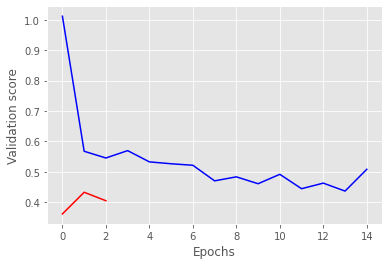

In [79]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()
# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))
# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model_1
model_1_training = model.fit(predictors, target_oh , epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target_oh , epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

# Adding layers to a network

You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.

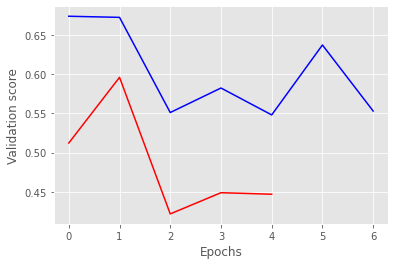

In [80]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model.fit(predictors, target_oh , epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors,  target_oh , epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


# Binary Classification 
## A binary classification model

Now that you know what the Banknote Authentication dataset looks like, we'll build a simple model to distinguish between real and fake bills.

You will perform binary classification by using a single neuron as an output. The input layer will have 4 neurons since we have 4 features in our dataset. The model's output will be a value constrained between 0 and 1.

We will interpret this output number as the probability of our input variables coming from a fake dollar bill, with 1 meaning we are certain it's a fake bill.

In [ ]:
import pandas as pd 
import pandas as pd
from bs4 import BeautifulSoup

'''def convert_to_xlsx():
    with open('sample.xls') as xml_file:
        soup = BeautifulSoup(xml_file.read(), 'xml')
        writer = pd.ExcelWriter('sample.xlsx')
        for sheet in soup.findAll('Worksheet'):
            sheet_as_list = []
            for row in sheet.findAll('Row'):
                sheet_as_list.append([cell.Data.text if cell.Data else '' for cell in row.findAll('Cell')])
            pd.DataFrame(sheet_as_list).to_excel(writer, sheet_name=sheet.attrs['ss:Name'], index=False, header=False)

        writer.save()'''

banknotes = pd.read_excel('/home/abderrazak/ALLINHERE/NLP/Datacamp/banknotes.xlsx')

In [ ]:
# Import seaborn
import seaborn as sns

# Use pairplot and set the hue to be our class column
sns.pairplot(banknotes, hue='class') 
# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations per class
print('Observations per class: \n', banknotes['class'].value_counts())

In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


# Keras Lesson2
Hello nets!

You're going to build a simple neural network to get a feeling of how quickly it is to accomplish this in Keras.

You will build a network that takes two numbers as an input, passes them through a hidden layer of 10 neurons, and finally outputs a single non-constrained number.


A non-constrained output can be obtained by avoiding setting an activation function in the output layer. This is useful for problems like regression, when we want our output to be able to take any non-constrained value.

In [ ]:
# Instantiate a new Sequential model
model = Sequential()

# Add a Dense layer with five neurons and three inputs
model.add(Dense(5, input_shape=(3,), activation="relu"))

# Add a final Dense layer with one neuron and no activation
model.add(Dense(1))

# Summarize your model
model.summary()

# Example1 

In [ ]:
# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Dense(50, input_shape=(1,), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))

# End your model with a Dense layer and no activation
model.add(Dense(1))
# Compile your model
model.compile(optimizer = 'adam', loss= 'mse')

print("Training started..., this can take a while:")

# Fit your model on your data for 30 epochs
model.fit(time_steps,y_positions, epochs = 30)

# Evaluate your model 
print("Final loss value:",model.evaluate(time_steps, y_positions))

In [ ]:
# Predict the twenty minutes orbit
twenty_min_orbit = model.predict(np.arange(-10, 11))

# Plot the twenty minute orbit 
plot_orbit(twenty_min_orbit)

# Binary classification
## A binary classification model

Now that you know what the Banknote Authentication dataset looks like, we'll build a simple model to distinguish between real and fake bills.

You will perform binary classification by using a single neuron as an output. The input layer will have 4 neurons since we have 4 features in our dataset. The model's output will be a value constrained between 0 and 1.

We will interpret this output number as the probability of our input variables coming from a fake dollar bill, with 1 meaning we are certain it's a fake bill.
# EDA

In [ ]:
# Import seaborn
import seaborn as sns
import pandas as pd 
bankotes
# Use pairplot and set the hue to be our class column
sns.pairplot(banknotes, hue='class') 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations per class
print('Observations per class: \n', banknotes['class'].value_counts())

In [ ]:
# Import the sequential model and dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display a summary of your model
model.summary()

# Is this dollar bill fake ?

You are now ready to train your model and check how well it performs when classifying new bills! The dataset has already been partitioned into features: X_train & X_test, and labels: y_train & y_test.

In [ ]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs = 20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

# A multi-class model

You're going to build a model that predicts who threw which dart only based on where that dart landed! (That is the dart's x and y coordinates on the board.)

This problem is a multi-class classification problem since each dart can only be thrown by one of 4 competitors. So classes/labels are mutually exclusive, and therefore we can build a neuron with as many output as competitors and use the softmax activation function to achieve a total sum of probabilities of 1 over all competitors.

Keras Sequential model and Dense layer are already loaded for you to use.

In [ ]:
# Instantiate a sequential model
model = Sequential()
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Prepare your dataset

In the console you can check that your labels, darts.competitor are not yet in a format to be understood by your network. They contain the names of the competitors as strings. You will first turn these competitors into unique numbers,then use the to_categorical() function from keras.utils to turn these numbers into their one-hot encoded representation.

This is useful for multi-class classification problems, since there are as many output neurons as classes and for every observation in our dataset we just want one of the neurons to be activated.

The dart's dataset is loaded as darts. Pandas is imported as pd. Let's prepare this dataset

In [ ]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 


# Prepare your dataset

In the console you can check that your labels, darts.competitor are not yet in a format to be understood by your network. They contain the names of the competitors as strings. You will first turn these competitors into unique numbers,then use the to_categorical() function from keras.utils to turn these numbers into their one-hot encoded representation.

This is useful for multi-class classification problems, since there are as many output neurons as classes and for every observation in our dataset we just want one of the neurons to be activated.

The dart's dataset is loaded as darts. Pandas is imported as pd. Let's prepare this dataset!

In [ ]:

# Import to_categorical from keras utils module
from keras.utils import  to_categorical

coordinates = darts.drop(['competitor'], axis=1)
# Use to_categorical on your labels
competitors = to_categorical(darts.competitor)

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n',competitors)

# Training on dart throwers

Your model is now ready, just as your dataset. It's time to train!

The coordinates features and competitors labels you just transformed have been partitioned into coord_train,coord_test and competitors_train,competitors_test.

Your model is also loaded. Feel free to visualize your training data or model.summary() in the console.

Let's find out who threw which dart just by looking at the board!

In [ ]:
# Fit your model to the training data for 200 epochs
model.fit(coord_train,competitors_train,epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

# Softmax predictions

Your recently trained model is loaded for you. This model is generalizing well!, that's why you got a high accuracy on the test set.

Since you used the softmax activation function, for every input of 2 coordinates provided to your model there's an output vector of 4 numbers. Each of these numbers encodes the probability of a given dart being thrown by one of the 4 possible competitors.

When computing accuracy with the model's .evaluate() method, your model takes the class with the highest probability as the prediction. np.argmax() can help you do this since it returns the index with the highest value in an array.

Use the collection of test throws stored in coords_small_test and np.argmax()to check this out!

In [ ]:
# Predict on coords_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_small_test[i]))

# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred)for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds_chosen):
  print("{:25} | {}".format(pred,competitors_small_test[i]))

# Multi-label classification


Now that you know how multi-class classification works, we can take a look at multi-label classification. They both deal with predicting classes, but in multi-label classification, a single input can be assigned to more than one class.
2. Real world examples

We could use multi-label classification, for instance, to tag a serie’s genres by its plot summary.
3. Real world examples

Making models that deal with text or images is not covered in this course in depth. We will learn more about it on chapter 4.
4. Multi-class vs multi-label

Imagine we had three classes; sun, moon and clouds. In multi-class problems if we took a sample of our observations each individual in the sample will belong to a unique class. However in a multi-label problem each individual in the sample can have all, none or a subset of the available classes. As you can see in the image, multi-label vectors are also one-hot encoded, there's a 1 or a 0 representing the presence or absence of each class.

    1 https://gombru.github.io/2018/05/23/cross_entropy_loss/

5. The architecture

Making a multi-label model for this problem is not very different to what you did when building your multi-class model. We first instantiate a sequential model. For the sake of this example, we will assume that to differentiate between these 3 classes, we need just one input and 2 hidden neurons. The biggest changes happen in the output layer and in its activation function. In the output layer, we use as many neurons as possible classes but we use sigmoid activation this time.
6. Sigmoid outputs

We use sigmoid outputs because we no longer care about the sum of probabilities. We want each output neuron to be able to individually take a value between 0 and 1. This can be achieved with the sigmoid activation because it constrains our neuron output in the range 0-1. That's what we did in binary classification, though we only had one output neuron there.
7. Compile and train

Binary cross-entropy is now used as the loss function when compiling the model. You can look at it as if you were performing several binary classification problems: for each output we are deciding whether or not its corresponding label is present. When training our model we can use the validation_split argument to print validation loss and accuracy as it trains. By using validation_split, a percentage of training data is left out for testing at each epoch.
8. An advantage

Using neural networks for multi-label classification can be performed by minor tweaks in our model architecture. If we were to use a classical machine learning approach to solve multi-label problems we would need more complex methods. One way to do so consists of training several classifiers to distinguish each particular class from the rest. This is called one versus rest classification.
9. An irrigation machine

Let's tackle a new problem. A farm field has an array of 20 sensors distributed along 3 crop fields. These sensors measure, among other things, the humidity of the soil, radiation of the sun, etc. Your task is to use the combination of measurements of these sensors to decide which parcels to water, given each parcel has different environmental requirements.
10. An irrigation machine

Each sensor measures an integer value between 0 and 13 volts. Parcels can be represented as one-hot encoded vectors of length 3, where each index is one of the parcels. Parcels can be watered simultaneously.
11. Let's practice!

Let's put what you just learned to the test! 

In [ ]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])
model.summary()

# Training with multiple labels

An output of your multi-label model could look like this: [0.76 , 0.99 , 0.66 ]. If we round up probabilities higher than 0.5, this observation will be classified as containing all 3 possible labels [1,1,1]. For this particular problem, this would mean watering all 3 parcels in your farm is the right thing to do, according to the network, given the input sensor measurements.

You will now train and predict with the model you just built. sensors_train, parcels_train, sensors_test and parcels_test are already loaded for you to use.

Let's see how well your intelligent machine performs!
Hint

    The .fit() method needs the features and the labels of the training data as parameters.
    The .predict() method receives the features of the test data as parameters.
    np.round() takes an array of predictions and rounds them up.
    The .evaluate() method receives the features and the labels of the test data as parameters.


In [ ]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate( parcels_test,parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

# Keras callbacks
1. Keras callbacks

By now you've trained a lot of models. It's time to learn more about how to better control and supervise model training by using callbacks.
2. What is a callback?

A callback is a function that is executed after some other function, event, or task has finished. For instance, when you touch your phone screen, a block of code that identifies the type of gesture will be triggered. Since this block of code has been called after the touching event occurred, it's a callback.
3. Callbacks in Keras

In the same way, a keras callback is a block of code that gets executed after each epoch during training or after the training is finished. They are useful to store metrics as the model trains and to make decisions as the training goes by.
4. A callback you've been missing

Every time you call the fit method on a keras model there's a callback object that gets returned after the model finishes training. This is the history object. Accessing the history attribute, which is a python dictionary,we can check the saved metrics of the model at each epoch during training as an array of numbers.
5. A callback you've been missing

To get the most out of the history object we should use the validation_data parameter in our fit method, passing X_test and y_test as a tuple. The validation_split parameter can be used instead, specifying a percentage of the training data that will be left out for testing purposes. That way we not only have the training metrics but also the validation metrics.
6. History plots

You can compare training and validation metrics with a few matplotlib commands. We just need to define a figure. Plot the values of the history attribute for the training accuracy (acc) and the validation accuracy (val_acc). We can then make our graph prettier by adding a title, axis labels and a legend.
7. History plots

We can see our model accuracy increases for both training and test sets till it reaches epoch 25. Then accuracy flattens for the test set whilst the training keeps improving. Overfitting it's taking place since we see the train keeps improving as test data decreases in accuracy. More on this in the next chapter.
8. Early stopping

Early stopping a model can solve the overfitting problem. Since it stops its training when it no longer improves. This is extremely useful since deep neural models can take a long time to train and we don't know beforehand how many epochs will be needed. Early stopping, like other keras callbacks can be imported from keras callbacks. We then need to instantiate it. The early stopping callback can monitor several metrics, like validation accuracy, validation loss, etc. These can be specified in the monitor parameter. It's also important to define a patience argument, that is the number of epochs to wait for the model to improve before stopping it's training. There's no rules to decide which patience number works best at all times,this depends on the implementation. It's good to avoid low values, that way your model has a chance to improve at a later epoch.The callback is passed as a list to the callbacks parameter in the model fit method.
9. Model checkpoint

The model checkpoint callback can also be imported from keras callbacks. This callback allows us to save our model as it trains. We specify the model filename with a name and the .hdf5 extension. You can also decide what to monitor to determine which model is best with the monitor parameter, by default validation loss is monitored. Setting the save_best_only parameter to True guarantees that the latest best model according to the quantity monitored will not be overwritten. 

# The history callback

The history callback is returned by default every time you train a model with the .fit() method. To access these metrics you can access the history dictionary parameter inside the returned h_callback object with the corresponding keys.

The irrigation machine model you built in the previous lesson is loaded for you to train, along with its features and labels now loaded as X_train, y_train, X_test, y_test. This time you will store the model's historycallback and use the validation_data parameter as it trains.

You will plot the results stored in history with plot_accuracy() and plot_loss(), two simple matplotlib functions. You can check their code in the console by pasting show_code(plot_loss).

Let's see the behind the scenes of our training!

In [ ]:
# Train your model and save its history
h_callback = model.fit(X_train, y_train, epochs = 50,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['acc'], h_callback.history['val_acc'])

# Early stopping your model

The early stopping callback is useful since it allows for you to stop the model training if it no longer improves after a given number of epochs. To make use of this functionality you need to pass the callback inside a list to the model's callback parameter in the .fit() method.

The model you built to detect fake dollar bills is loaded for you to train, this time with early stopping. X_train, y_train, X_test and y_test are also available for you to use.

In [ ]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping
# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', 
                       patience=5)

# Train your model using the early stopping callback
model.fit(X_train,y_train, 
           epochs=1000, validation_data=(X_test,y_test),
           callbacks= [monitor_val_acc])

# A combination of callbacks

Deep learning models can take a long time to train, especially when you move to deeper architectures and bigger datasets. Saving your model every time it improves as well as stopping it when it no longer does allows you to worry less about choosing the number of epochs to train for. You can also restore a saved model anytime and resume training where you left it.

The model training and validation data are available in your workspace as X_train, X_test, y_train, and y_test.

Use the EarlyStopping() and the ModelCheckpoint() callbacks so that you can go eat a jar of cookies while you leave your computer to work!

In [ ]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_acc', patience = 3)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint =  ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model.fit(X_train, y_train,
                    epochs = 1000000000000,
                    callbacks = [monitor_val_acc, modelCheckpoint],
                    validation_data = (X_test,y_test))

# Learning curves

You're going to build a model on the digits dataset, a sample dataset that comes pre-loaded with scikit learn. The digits dataset consist of 8x8 pixel handwritten digits from 0 to 9:
You want to distinguish between each of the 10 possible digits given an image, so we are dealing with multi-class classification.

The dataset has already been partitioned into X_train, y_train, X_test, and y_test, using 30% of the data as testing data. The labels are already one-hot encoded vectors, so you don't need to use Keras to_categorical() function.

Let's build this new model!

In [ ]:
# Instantiate a Sequential model
model = Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu 
model.add(Dense(16, input_shape = (64,), activation = 'relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(Dense(10,activation='softmax'))

# Compile your model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Test if your model is well assembled by predicting before training
print(model.predict(X_train))

# Is the model overfitting?

Let's train the model you just built and plot its learning curve to check out if it's overfitting! You can make use of the loaded function plot_loss() to plot training loss against validation loss, you can get both from the history callback.

If you want to inspect the plot_loss() function code, paste this in the console: show_code(plot_loss)

In [ ]:
# Train your model for 60 epochs, using X_test and y_test as validation data
h_callback = model.fit(X_train, y_train, epochs = 60, validation_data = (X_test,y_test), verbose=0)

# Extract from the h_callback object loss and val_loss to plot the learning curve
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

This graph doesn't show overfitting but convergence. It looks like your model has learned all it could from the data and it no longer improves. The test loss, although higher than the training loss, is not getting worse, so we aren't overfitting to the training data.

# Do we need more data?

It's time to check whether the digits dataset model you built benefits from more training examples!

In order to keep code to a minimum, various things are already initialized and ready to use:

    The model you just built.
    X_train,y_train,X_test, and y_test.
    The initial_weights of your model, saved after using model.get_weights().
    A pre-defined list of training sizes: training_sizes.
    A pre-defined early stopping callback monitoring loss: early_stop.
    Two empty lists to store the evaluation results: train_accs and test_accs.

Train your model on the different training sizes and evaluate the results on X_test. End by plotting the results with plot_results().

The full code for this exercise can be found on the slid

In [ ]:
for size in training_sizes:
  	# Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    # Reset the model to the initial weights and train it on the new training data fraction
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop])

    # Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(model.evaluate(X_train,y_train)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])
    
# Plot train vs test accuracies
plot_results(train_accs, test_accs)

# Activation functions
## Comparing activation functions

Comparing activation functions involves a bit of coding, but nothing you can't do!

You will try out different activation functions on the multi-label model you built for your farm irrigation machine in chapter 2. The function get_model('relu') returns a copy of this model and applies the 'relu' activation function to its hidden layer.

You will loop through several activation functions, generate a new model for each and train it. By storing the history callback in a dictionary you will be able to visualize which activation function performed best in the next exercise!

X_train, y_train, X_test, y_test are ready for you to use when training your models

In [ ]:
# Activation functions to try
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
    # Get a new model with the current activation
    model = get_model(act)
    # Fit the model and store the history results
    h_callback =model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs= 20, verbose=0 )
    activation_results[act] = h_callback

# Comparing activation functions II

What you coded in the previous exercise has been executed to obtain theactivation_results variable, this time 100 epochs were used instead of 20. This way you will have more epochs to further compare how the training evolves per activation function.

For every h_callback of each activation function in activation_results:

    The h_callback.history['val_loss'] has been extracted.
    The h_callback.history['val_acc'] has been extracted.

Both are saved into two dictionaries: val_loss_per_function and val_acc_per_function.

Pandas is also loaded as pd for you to use. Let's plot some quick validation loss and accuracy charts!

In [ ]:
# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(val_loss_per_function)

# Call plot on the dataframe
val_loss.plot()
plt.show()

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(val_acc_per_function)

# Call plot on the dataframe
val_acc.plot()
plt.show()

# Batch size and batch normalization
1. Batch size and batch normalization

It’s time to learn the concepts of batch size and batch normalization.
2. Batches

A mini-batch is a subset of data samples. If we were training a neural network with images, each image in our training set would be a sample and we could take mini-batches of different sizes from the training set batch.
3. Mini-batch

Remember that during an epoch we feed our network, calculate the errors and update the network weights. It's not very practical to update our network weights only once per epoch after looking at the error produced by all training samples. In practice, we take a mini-batch of training samples. That way, if our training set has 9 images and we choose a batch_size of 3, we will perform 3 weight updates per epoch, one per mini-batch.
4. Mini-batches

Networks tend to train faster with mini-batches since weights are updated often. Sometimes datasets are so huge that they would struggle to fit in RAM memory if we didn't use mini-batches. Also, the noise produced by a small batch-size can help escape local minima. A couple of disadvantages are the need for more iterations and finding a good batch size.
5. Effects of batch sizes

Here you can see how different batch sizes converge towards a minimum as training goes by. Training with all samples is shown in blue. Mini-batching is shown in green. Stochastic gradient descent, in red, uses a batch_size of 1. We can see how the path towards the best value for our weights is noisier the smaller the batch_size. They reach the same value after a different number of iterations.

    1 Stack Exchange

6. Batch size in Keras

You can set your own batch_size with the batch_size parameter on the model's fit method. Keras uses a default batch-size of 32. Increasing powers of two tend to be used. As a rule of thumb, you tend to make your batch size bigger the bigger your dataset.
7. Normalization in machine learning

Normalization is a common pre-processing step in machine learning algorithms, especially when features have different scales. One way to normalize data is to subtract its mean value and divide by the standard deviation.We always tend to normalize our model inputs. This avoids problems with activation functions and gradients.
8. Normalization in machine learning

This leaves everything centered around 0 with a standard deviation of 1.
9. Reasons for batch normalization

Normalizing neural networks inputs improve our model. But deeper layers are trained based on previous layer outputs and since weights get updated via gradient descent, consecutive layers no longer benefit from normalization and they need to adapt to previous layers' weight changes, finding more trouble to learn their own weights. Batch normalization makes sure that, independently of the changes, the inputs to the next layers are normalized. It does this in a smart way, with trainable parameters that also learn how much of this normalization is kept scaling or shifting it.
10. Batch normalization advantages

This improves gradient flow, allows for higher learning rates, reduces weight initializations dependence, adds regularization to our network and limits internal covariate shift; which is a funny name for a layer's dependence on the previous layer outputs when learning its weights. Batch normalization is widely used today in many deep learning models.
11. Batch normalization in Keras

Batch normalization in Keras is applied as a layer. So we can place it in between two layers. We import batch normalization from Keras layers. We then instantiate a sequential model, add an input layer, and then add a batch normalization layer. We finalize this binary classification model with an output layer. 

# Changing batch sizes

You've seen models are usually trained in batches of a fixed size. The smaller a batch size, the more weight updates per epoch, but at a cost of a more unstable gradient descent. Specially if the batch size is too small and it's not representative of the entire training set.

Let's see how different batch sizes affect the accuracy of a simple binary classification model that separates red from blue dots.

You'll use a batch size of one, updating the weights once per sample in your training set for each epoch. Then you will use the entire dataset, updating the weights only once per epoch.

In [ ]:
# Get a fresh new model with get_model
model =get_model()

# Train your model for 5 epochs with a batch size of 1
model.fit(X_train, y_train, epochs=5, batch_size=1)
print("\n The accuracy when using a batch of size 1 is: ",
      model.evaluate(X_test, y_test)[1])

In [ ]:
model = get_model()

# Fit your model for 5 epochs with a batch of size the training set
model.fit(X_train, y_train, epochs=5,batch_size=len(X_train))
print("\n The accuracy when using the whole training set as batch-size was: ",
      model.evaluate(X_test, y_test)[1])

You can see that accuracy is lower when using a batch size equal to the training set size. This is not because the network had more trouble learning the optimization function: Even though the same number of epochs were used for both batch sizes the number of resulting weight updates was very different!. With a batch of size the training set and 5 epochs we only get 5 updates total, each update computes and averaged gradient descent with all the training set observations. To obtain similar results with this batch size we should increase the number of epochs so that more weight updates take place.
# Batch normalizing a familiar model

Remember the digits dataset you trained in the first exercise of this chapter?
A multi-class classification problem that you solved using softmax and 10 neurons in your output layer.

You will now build a new deeper model consisting of 3 hidden layers of 50 neurons each, using batch normalization in between layers. The kernel_initializer parameter is used to initialize weights in a similar w

In [ ]:
# Import batch normalization from keras layers
from keras.layers import  BatchNormalization

# Build your deep network
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
batchnorm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Batch normalization effects

Batch normalization tends to increase the learning speed of our models and make their learning curves more stable. Let's see how two identical models with and without batch normalization compare.

The model you just built batchnorm_model is loaded for you to use. An exact copy of it without batch normalization: standard_model, is available as well. You can check their summary() in the console. X_train, y_train, X_test, and y_test are also loaded so that you can train both models.

You will compare the accuracy learning curves for both models plotting them with compare_histories_acc().

You can check the function pasting show_code(compare_histories_acc) in the console.

In [ ]:
def compare_histories_acc(h1,h2):
    plt.plot(h1.history['acc'])
    plt.plot(h1.history['val_acc'])
    plt.plot(h2.history['acc'])
    plt.plot(h2.history['val_acc'])
    plt.title("Batch Normalization Effects")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')
    plt.show()

In [ ]:
# Train your standard model, storing its history callback
h1_callback = standard_model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10, verbose=0)

# Train the batch normalized model you recently built, store its history callback
h2_callback = batchnorm_model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10, verbose=0)

# Call compare_histories_acc passing in both model histories
compare_histories_acc(h1_callback, h2_callback)

# Hyperparameter tuning

# Preparing a model for tuning

Let's tune the hyperparameters of a binary classification model that does well classifying the breast cancer dataset.

You've seen that the first step to turn a model into a sklearn estimator is to build a function that creates it. The definition of this function is important since hyperparameter tuning is carried out by varying the arguments your function receives.

Build a simple create_model() function that receives both a learning rate and an activation function as arguments. The Adam optimizer has been imported as an object from keras.optimizers so that you can also change its learning rate parameter.

In [ ]:
# Creates a model given an activation and learning rate
def create_model(learning_rate, activation):
  
  	# Create an Adam optimizer with the given learning rate
  	opt = Adam(lr =learning_rate)
  	
  	# Create your binary classification model  
  	model = Sequential()
  	model.add(Dense(128, input_shape = (30,), activation = activation))
  	model.add(Dense(256, activation = activation))
  	model.add(Dense(1, activation = 'sigmoid'))
  	
  	# Compile your model with your optimizer, loss, and metrics
  	model.compile(optimizer = opt, loss = 'binarycross_entropy', metrics = ['accuracy'])
  	return model

# Tuning the model parameters

It's time to try out different parameters on your model and see how well it performs!

The create_model() function you built in the previous exercise is ready for you to use.

Since fitting the RandomizedSearchCV object would take too long, the results you'd get are printed in the show_results() function. You could try random_search.fit(X,y) in the console yourself to check it does work after you have built everything else, but you will probably timeout the exercise (so copy your code first if you try this or you can lose your progress!).

You don't need to use the optional epochs and batch_size parameters when building your KerasClassifier object since you are passing them as params to the random search and this works already.

In [ ]:
# Import KerasClassifier from keras scikit learn wrappers
from keras.wrappers.scikit_learn import  KerasClassifier

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {'activation': ['relu', 'tanh'], 'batch_size': [ 32, 128, 256], 
          'epochs': [50, 100, 200 ], 'learning_rate': [ 0.1, 0.01,  0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

# Running random_search.fit(X,y) would start the search,but it takes too long! 
show_results()

# Training with cross-validation

Time to train your model with the best parameters found: 0.001 for the learning rate, 50 epochs, a 128 batch_size and relu activations.

The create_model() function from the previous exercise is ready for you to use. X and y are loaded as features and labels.

Use the best values found for your model when creating your KerasClassifier object so that they are used when performing cross_validation.

End this chapter by training an awesome tuned model on the breast cancer dataset!

In [ ]:
# Import KerasClassifier from keras wrappers
from keras.wrappers.scikit_learn import KerasClassifier

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model(learning_rate =0.001, activation = 'relu'), epochs =50, 
             batch_size = 128, verbose = 0)

# Calculate the accuracy score for each fold
kfolds = cross_val_score(model,X, y, cv = 3)

# Print the mean accuracy
print('The mean accuracy was:', kfolds.mean())

# Print the accuracy standard deviation
print('With a standard deviation of:', kfolds.std())

1. Tensors, layers and autoencoders

Now that you know how to tune your models,it's time to better understand how they work and learn about new neural network architectures.
2. Accessing Keras layers

Model layers are easily accessible, we just need to call layers on a built model and access the index of the layer we want. From a chosen layer we can print its inputs, outputs, and weights. You can see inputs and outputs are tensors of a given shape built with TensorFlow tensor objects, weights are TensorFlow variable objects, which are just tensors that change their value as the neural network learns the best weights.
3. What are tensors?

Tensors are the main data structures used in deep learning, inputs, outputs, and transformations in neural networks are all represented using tensors. A tensor is a multi-dimensional array of numbers. A 2 dimensional tensor is a matrix, a 3 dimensional tensor is an array of matrices.
4. Keras backend

If we import the Keras backend we can build a function that takes in an input tensor from a given layer and returns an output tensor from another or the same layer. Tensorflow is the backend Keras is using in this course, but it could be any other, like Theano. To define the function with our backend K we need to give it a list of inputs and outputs, even if we just want 1 input and 1 output. Then we can use it on a tensor with the same shape as the input layer given during its definition. If the weights of the layers between our input and outputs change the function output for the same input will change as well. We can use this to see the output of certain layers as weights change during training, we will check this in the exercises!
5. Introducing autoencoders

It's time to introduce a new architecture.
6. Autoencoders!

Autoencoders! Autoencoders are models that aim at producing the same inputs as outputs.
7. Autoencoders!

This task alone wouldn't be very useful, but since along the way we decrease the number of neurons, we are effectively making our network learn to compress its inputs into a small set of neurons.
8. Autoencoder use cases

This makes autoencoders useful for things like: Dimensionality reduction, since we can obtain a smaller dimensional space representation of our inputs. De-noising, if trained with clear data and then fed with noisy data they will be able to decode back a good representation of the input data without noise. Anomaly detection, if you train an autoencoder to map inputs to outputs with data but you then pass in strange values, the network will fail at giving accurate output values. Many other applications can also benefit from this architecture.
9. Building a simple autoencoder

To make an autoencoder that maps a hundred inputs to a hundred outputs, encoding the inputs into a layer of 4 neurons, we would do the following: Instantiate a sequential model, add a dense layer of 4 neurons with an input_shape of a hundred and end with an output layer of 100 neurons. We use activation sigmoid because we assume that our output can take a value between 0 and 1, we end compiling our model with adam optimizer and binary_crossentropy loss since we used sigmoid.
10. Breaking it into an encoder

Once you've built and trained your autoencoder you might want to encode your inputs. To do this, you just have to build a new model and add the first layer of your previously trained autoencoder. This new model predictions returns the 4 numbers given by the 4 neurons of the hidden layer for each observation in the input dataset. 
# It's a flow of tensors

If you have already built a model, you can use the model.layers and the keras.backend to build functions that, provided with a valid input tensor, return the corresponding output tensor.

This is a useful tool when we want to obtain the output of a network at an intermediate layer.

For instance, if you get the input and output from the first layer of a network, you can build an inp_to_out function that returns the result of carrying out forward propagation through only the first layer for a given input tensor.

So that's what you're going to do right now!

X_test from the Banknote Authentication dataset and its model are preloaded. Type model.summary() in the console to check it.

In [ ]:
# Import keras backend
import keras.backend as K

# Input tensor from the 1st layer of the model
inp = model.layers[0].input

# Output tensor from the 1st layer of the model
out = model.layers[0].output

# Define a function from inputs to outputs
inp_to_out = K.function([inp], [out])

# Print the results of passing X_test through the 1st layer
print(inp_to_out([X_test]))

# Neural separation

Put on your gloves because you're going to perform brain surgery!

Neurons learn by updating their weights to output values that help them better distinguish between the different output classes in your dataset. You will make use of the inp_to_out() function you just built to visualize the output of two neurons in the first layer of the Banknote Authentication model as it learns.

The model you built in chapter 2 is ready for you to use, just like X_test and y_test. Paste show_code(plot) in the console if you want to check plot().

You're performing heavy duty, once all is done, click through the graphs to watch the separation live!

In [ ]:
for i in range(0, 21):
  	# Train model for 1 epoch
    h = model.fit(X_train, y_train, batch_size = 16, epochs = 1, verbose = 0)
    if i%4==0: 
        # Get the output of the first layer
        layer_output = inp_to_out([X_test])[0]
      
        # Evaluate model accuracy for this epoch
        test_accuracy = model.evaluate(X_test, y_test)[1] 
      
      # Plot 1st vs 2nd neuron output
      plot()

# Building an autoencoder

Autoencoders have several interesting applications like anomaly detection or image denoising. They aim at producing an output identical to its inputs. The input will be compressed into a lower dimensional space, encoded. The model then learns to decode it back to its original form.

You will encode and decode the MNIST dataset of handwritten digits, the hidden layer will encode a 32-dimensional representation of the image, which originally consists of 784 pixels (28 x 28). The autoencoder will essentially learn to turn the 784 pixels original image into a compressed 32 pixels image and learn how to use that encoded representation to bring back the original 784 pixels image.

The Sequential model and Dense layers are ready for you to use.

Let's build an autoencoder!

In [ ]:
# Start with a sequential model
autoencoder = Sequential()

# Add a dense layer with input the original image pixels and neurons the encoded representation
autoencoder.add(Dense(32, input_shape=(784, ), activation="relu"))

# Add an output layer with as many neurons as the orginal image pixels
autoencoder.add(Dense(784, activation = "sigmoid"))

# Compile your model with adadelta
autoencoder.compile(optimizer = 'adadelta', loss ='binary_crossentropy')

# Summarize your model structure
autoencoder.summary()

# De-noising like an autoencoder

Okay, you have just built an autoencoder model. Let's see how it handles a more challenging task.

First, you will build a model that encodes images, and you will check how different digits are represented with show_encodings(). To build the encoder you will make use of your autoencoder, that has already being trained. You will just use the first half of the network, which contains the input and the bottleneck output. That way, you will obtain a 32 number output which represents the encoded version of the input image.

Then, you will apply your autoencoder to noisy images from MNIST, it should be able to clean the noisy artifacts.

X_test_noise is loaded in your workspace. The digits in this noisy dataset look like this:

In [ ]:
# Build your encoder by using the first layer of your autoencoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])

# Encode the noisy images and show the encodings for your favorite number [0-9]
encodings = encoder.predict( X_test_noise)
show_encodings(encodings, number = 1)

In [ ]:
# Build your encoder by using the first layer of your autoencoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])

# Encode the noisy images and show the encodings for your favorite number [0-9]
encodings = encoder.predict(X_test_noise)
show_encodings(encodings, number = 1)

# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(X_test_noise)

# Plot noisy vs decoded images
compare_plot(X_test_noise, decoded_imgs)

The noise is gone now! You could get a better reconstruction by using a convolutional autoencoder. I hope this new model opened up your mind to the many possible architectures and non-classical ML problems that neural networks can solve :)

1. Intro to CNNs

Let’s introduce Convolutional Neural Networks, a specific type of network that has led to a lot of advances in computer vision, as well as in other areas.
2. How do they work?

A convolutional model uses convolutional layers. A convolution is a simple mathematical operation that preserves spatial relationships. When applied to images it can detect relevant areas of interest like edges, corners, vertical lines, etc.
3. Convolutions demonstration

It consists of applying a filter also known as kernel of a given size. In this image, we are applying a 3 by 3 kernel. We center the kernel matrix of numbers as we slide through each pixel in the image, multiplying the kernel and pixel values at each location and averaging the sum of values obtained. This effectively computes a new image where certain characteristics are amplified depending on the filter used. The secret sauce of CNNs resides in letting the network itself find the best filter values and to combine them to achieve a given task.
4. Typical architectures

For a classification problem with many possible classes, CNNs tend to become very deep. Architectures consist of concatenations of convolutional layers among other layers known as pooling layers, that we won't cover here. Convolutional layers perform feature learning, we then flatten the outputs into a unidimensional vector and pass it to fully connected layers that carry out classification.
5. Input shape to convolutional neural networks

Images are 3D tensors, they have width, height, and depth. This depth is given by the color channels. If we use black and white images we will just have one channel, so the depth will be 1.
6. How to build a simple convolutional net in keras?

To build a CNN in Keras we first import the Conv2D and Flatten layers from keras.layers. We instantiate our model and add a convolutional layer. This first convolutional layer has 32 filters, this means it will learn 32 different convolutional masks. These masks will be squares of 3 by 3 as defined in the kernel_size. For 28 times 28 black and white images with only one channel, we use an input shape of (28, 28, 1). We can use any activation, as usual. We then add another convolutional layer and end flattening this 2D layer into a unidimensional layer with the Flatten layer. We finish with an output dense layer.
7. Deep convolutional models

ResNet50 is a 50 layer-deep model that performs well on the Imagenet Dataset, a huge dataset of more than 14 million images. ResNet50 can distinguish between 1000 different classes. This model would take too long to train on a regular computer, but Keras makes it easy for us to use it. We just need to prepare the image we want to classify for the model, predict the processed image, and decode the predictions!
8. Pre-processing images for ResNet50

To use pre-trained models to classify images, we first have to adapt these images so that they can be understood by the model. To prepare images for ResNet50 we would do the following. First import the image from keras.preprocessing and preprocess_input from keras.applications.resnet50. We then load our image with load_img, providing the target size, for this particular model that is 224 by 224. We turn the image into a numpy array with img_to_array, we expand the dimensions of the array and preprocess the input in the same way the training images were.
9. Using the ResNet50 model in Keras

We import ResNet50 and decode_predictions,load the model with Imagenet pre_trained weights,predict on our image,and decode the predictions. That is, getting the predicted classes with the highest probabilities.
10. What is going on inside a convnet?

Inside a CNN we can check how the different filters activate in response to an input image. We will explore this in the exercises!
# Building a CNN model

Building a CNN model in Keras isn't much more difficult than building any of the models you've already built throughout the course! You just need to make use of convolutional layers.

You're going to build a shallow convolutional model that classifies the MNIST digits dataset. The same one you de-noised with your autoencoder! The images are 28 x 28 pixels and just have one channel, since they are black and white pictures.

Go ahead and build this small convolutional model!

In [ ]:
# Import the Conv2D and Flatten layers and instantiate model
from keras.layers import Conv2D,Flatten
model = Sequential()

# Add a convolutional layer of 32 filters of size 3x3 
model.add(Conv2D(32, kernel_size = 3, input_shape = (28, 28, 1), activation = 'relu'))

# Add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(16, kernel_size = 3, activation = 'relu'))

# Flatten the previous layer output 
model.add(Flatten())

# Add as many outputs as classes with softmax activation
model.add(Dense(10, activation = 'softmax'))

# Looking at convolutions

Inspecting the activations of a convolutional layer is a cool thing. You have to do it at least once in your lifetime!

To do so, you will build a new model with the Keras Model object, which takes in a list of inputs and a list of outputs. The output you will provide to this new model is the first convolutional layer outputs when given an MNIST digit as input image.

The convolutional model you built in the previous exercise has already been trained for you. It can now correctly classify MNIST handwritten images. You can check it with model.summary() in the console.

Let's look at the convolutional masks that were learned in the first convolutional layer of this model!

In [ ]:
# Obtain a reference to the outputs of the first layer
first_layer_output = model.layers[0].output

# Build a model using the model input and the first layer output
first_layer_model = Model(inputs = model.layers[0].input, outputs = first_layer_output)

# Use this model to predict on X_test
activations = first_layer_model.predict(X_test)

# Plot the first digit of X_test for the 15th filter
axs[0].matshow(activations[0,:,:,14], cmap = 'viridis')

# Do the same but for the 18th filter now
axs[1].matshow(activations[0,:,:,17], cmap = 'viridis')
plt.show()

# Preparing your input image

The original ResNet50 model was trained with images of size 224 x 224 pixels and a number of preprocessing operations; like the subtraction of the mean pixel value in the training set for all training images. You need to pre-process the images you want to predict on in the same way.

When predicting on a single image you need it to fit the model's input shape, which in this case looks like this: (batch-size, width, height, channels),np.expand_dims with parameter axis = 0 adds the batch-size dimension, representing that a single image will be passed to predict. This batch-size dimension value is 1, since we are only predicting on one image.

You will go over these preprocessing steps as you prepare this dog's (named Ivy) image into one that can be classified by ResNet50.

In [ ]:
# Import image and preprocess_input
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

# Load the image with the right target size for your model
img = image.load_img(img_path, target_size = (224, 224))

# Turn it into an array
img_array = image.img_to_array(img)

# Expand the dimensions of the image, this is so that it fits the expected model input format
img_expanded = np.expand_dims(img_array, axis = 0)

# Pre-process the img in the same way original images were
img_ready = preprocess_input(img_expanded)

In [ ]:
# Instantiate a ResNet50 model with 'imagenet' weights
model = ResNet50(weights='imagenet')

# Predict with ResNet50 on your already processed img
preds = model.predict(img_ready)

# Decode the first 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

# Intro to LSTMs

It's time to briefly introduce Long Short Term Memory networks,also known as LSTMs.
2. What are RNNs?

LSTMs are a type of recurrent neural network, RNN for short. A simple RNN is a neural network that can use past predictions in order to infer new ones. This allows us to solve problems where there is a dependence on past inputs.
3. What are LSTMs?

LSTM neurons are pretty complex, they are actually called units or cells. They have an internal state that is passed between units, you can see this as a memory of past steps. A unit receives the internal state, an output from the previous unit, and a new input at time t. Then it updates the state and produces a new output that is returned, as well as passed as an input to the following unit.
4. What are LSTMs?

LSTM units perform several operations. They learn what to ignore, what to keep and to select the most important pieces of past information in order to predict the future. They tend to work better than simple RNNs for most problems.
5. When to use LSTMs?

LSTMs have been used for image captioning, speech to text, text translation, document summarization, text generation, musical composition,and many more.

    1 Karpathy, A., & Fei-Fei, L. (2015). Deep visual-semantic alignments for generating image descriptions.

6. LSTMs + Text

Let's go over an example on how to use LSTMs with text data to predict the next word in a sentence!
7. Embeddings

Neural networks can only deal with numbers, not text. We need to transform each unique word into a number. Then these numbers can be used as inputs to an embedding layer.
8. Embeddings

Embedding layers learn to represent words as vectors of a predetermined size. These vectors encode meaning and are used by subsequent layers.
9. Sequence preparation

We first define some text and choose a sequence length. With a sequence length of 3 we will end up feeding our model with two words and it will predict the third one. We split the text into words with the split method. The output looks like this: We then need to turn these words into consecutive lines of 3 words each. We can loop from seq_len to the number of words + 1 and store each line. The end results look like this:
10. Text preparation in Keras

After that we turn our text sequences into numbers. We import Keras Tokenizer from the preprocessing text module. Instantiate it, fit it on lines,and then turn those lines into numeric sequences. This is how the 3-word lines look now. The tokenizer object stores the word-to-number mapping. There are two dictionaries, the index_word, and the word_index. Here, the index_word is printed, which shows the encoded word for each index. We can use this dictionary to decode our outputs, mapping numbers to words.
11. Building a LSTM model

Our data is ready to be processed. Now, we are ready to build the LSTM model. We start by importing the Dense, LSTM, and Embedding layers from Keras layers. We then store the vocab_size, since we will use it when defining our layers. The vocab_size is the length of the tokenizer dictionary plus one. The plus one is because we account for 0 as an integer reserved for special characters, as we saw, our dictionary starts at 1, not 0. We add an embedding layer, the input_dim is the vocab_size variable, we will turn our word numbers into 8-dimensional vectors, and need to declare the input_length so that our model understand that two words will be passed simultaneously as a sequence. We end by adding an LSTM layer of 8 units, a hidden layer, and an output layer with softmax and as many outputs as possible words. 

# Text prediction with LSTMs

During the following exercises you will build a toy LSTM model that is able to predict the next word using a small text dataset. This dataset consist of cleaned quotes from the The Lord of the Ring movies. You can find them in the text variable.

You will turn this text into sequences of length 4 and make use of the Keras Tokenizer to prepare the features and labels for your model!

The Keras Tokenizer is already imported for you to use. It assigns a unique number to each unique word, and stores the mappings in a dictionary. This is important since the model deals with numbers but we later will want to decode the output numbers back into words.

In [ ]:
# Split text into an array of words
words = text.split()

# Make sentences of 4 words each, moving one word at a time
sentences = []
for i in range(4, len(words)):
    sentences.append(' '.join(words[i-4:i]))
  
#Instantiate a Tokenizer, then fit it on the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Turn sentences into a sequence of numbers
sequences = tokenizer.texts_to_sequences(sentences)
print("Sentences: \n {} \n Sequences: \n {}".format(sentences[:5],sequences[:5]))

# Build your LSTM model

You've already prepared your sequences of text. It's time to build your LSTM model!

Remember your sequences had 4 words each, your model will be trained on the first three words of each sequence, predicting the 4th one. You are going to use an Embedding layer that will essentially learn to turn words into vectors. These vectors will then be passed to a simple LSTM layer. Our output is a Dense layer with as many neurons as words in the vocabulary and softmax activation. This is because we want to obtain the highest probable next word out of all possible words.

In [ ]:
# Import the Embedding, LSTM and Dense layer
from keras.layers import Embedding, LSTM, Dense

model = Sequential()

# Add an Embedding layer with the right parameters
model.add(Embedding(input_dim =vocab_size, input_length = 3, output_dim =8, ))

# Add a 32 unit LSTM layer
model.add(LSTM(32))

# Add a hidden Dense layer of 32 units and an output layer of vocab_size with softmax
model.add(Dense(32, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

That's a nice looking model you've built! You'll see that this model is powerful enough to learn text relationships, we aren't using a lot of text in this tiny example and our sequences are quite short. This model is to be trained as usual, you would just need to compile it with an optimizer like adam and use crossentropy loss. This is because we have modeled this next word prediction task as a classification problem with all the unique words in our vocabulary as candidate classes.

In [ ]:
def predict_text(test_text, model = model):
    if len(test_text.split()) != 3:
    print('Text input should be 3 words!')
    return False

    # Turn the test_text into a sequence of numbers
    test_seq = tokenizer.texts_to_sequences([test_text])
    test_seq = np.array(test_seq)

    # Use the model passed as a parameter to predict the next word
    pred = model.predict(test_seq).argmax(axis = 1)[0]

    # Return the word that maps to the prediction
    return tokenizer.index_word[pred]